## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## **Part 1: Data Visualization and Analysis**

Understanding data characteristics and patterns is crucial for building effective models. In this part, we will visualize and analyze the `insurance.csv` dataset.

<b>Note: Remember to label plot axes while plotting.</b>

In [3]:
# Load the dataset
insurance_df = pd.read_csv('/content/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**1.1 Create a bar chart to compare the average insurance charges by sex and region.**


      sex       charges
0  female  12569.578844
1    male  13956.751178


<Axes: xlabel='sex', ylabel='charges'>

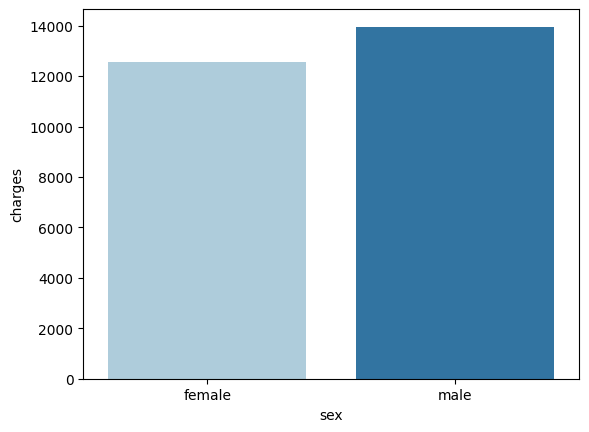

In [4]:
### Code here
avg_sex = insurance_df.groupby('sex', as_index=False)['charges'].mean()
print(avg_sex)

sns.barplot(data=avg_sex, x='sex', y='charges', hue ='sex', palette='Paired')

      region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


<Axes: xlabel='region', ylabel='charges'>

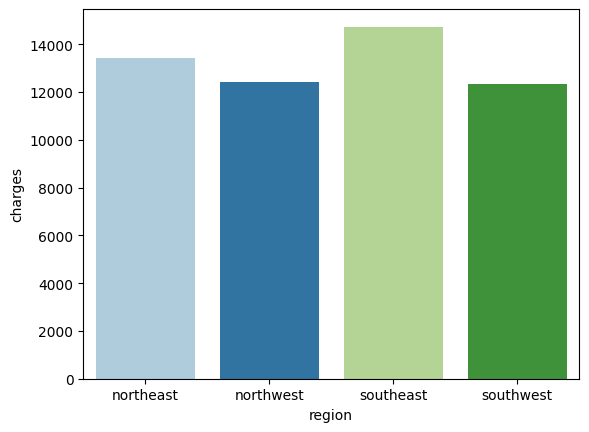

In [5]:
### Comment here
avg_region = insurance_df.groupby('region', as_index=False)['charges'].mean()
print(avg_region)

sns.barplot(data=avg_region, x='region', y='charges', hue='region', palette='Paired')

**1.2 Plot a small multiple of bar charts to visualize the data distribution for the following categorical variables:**
1. **sex**
2. **region**
3. **children**
4. **smoker**

**Make subplots in the same graph**

<Axes: xlabel='smoker', ylabel='count'>

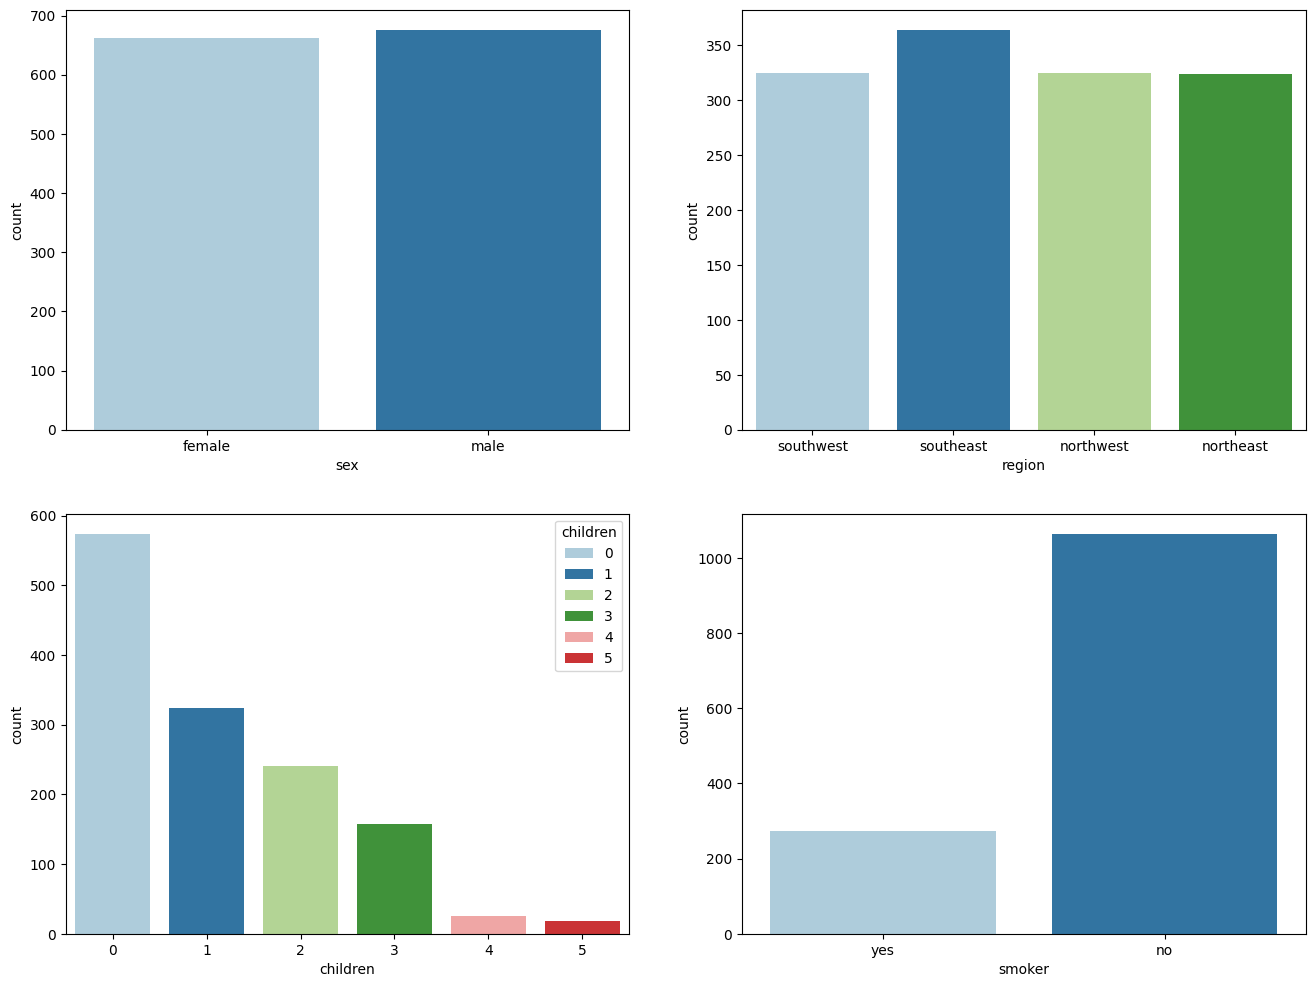

In [6]:
### Code here
fig, axes = plt.subplots(2,2, figsize=(16,12))

sns.countplot(data=insurance_df, x='sex', ax=axes[0,0], hue='sex', palette='Paired') # sex
sns.countplot(data=insurance_df, x='region', ax=axes[0,1], hue='region', palette='Paired') # region
sns.countplot(data=insurance_df, x='children', ax=axes[1, 0], hue='children', palette='Paired') # children
sns.countplot(data=insurance_df, x='smoker', ax=axes[1,1], hue='smoker', palette='Paired') # smoker

"\nsns.countplot(data=insurance_df, x='sex', ax=axes[0,0], hue='sex', palette='Paired') # sex\naxes[0,0].set_ylim(0, set_yrange+100)\nsns.countplot(data=insurance_df, x='region', ax=axes[0,1], hue='region', palette='Paired') # region\naxes[0,1].set_ylim(0, set_yrange+100)\nsns.countplot(data=insurance_df, x='children', ax=axes[1, 0], hue='children', palette='Paired') # children\naxes[1,0].set_ylim(0, set_yrange+100)\nsns.countplot(data=insurance_df, x='smoker', ax=axes[1,1], hue='smoker', palette='Paired') # smoker\naxes[1,1].set_ylim(0, set_yrange+100)\n"

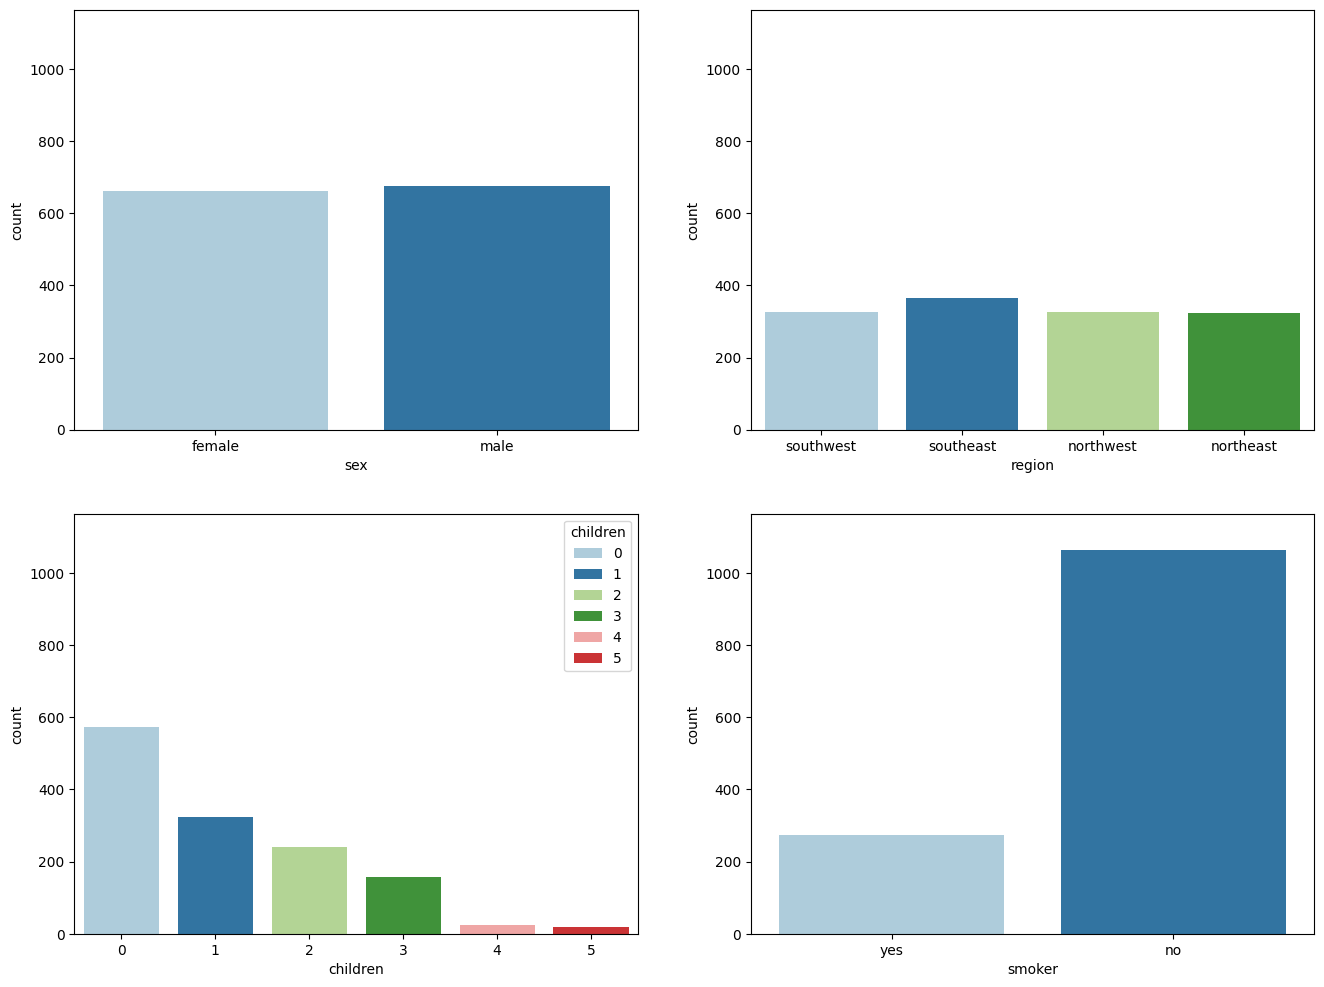

In [7]:
### Code here
fig, axes = plt.subplots(2,2, figsize=(16,12))

set_yrange = max(insurance_df['sex'].value_counts().max(),
            insurance_df['region'].value_counts().max(),
            insurance_df['children'].value_counts().max(),
            insurance_df['smoker'].value_counts().max())
# print(set_yrange)

num_features = ['sex', 'region', 'children', 'smoker']
for var, subplot in zip(num_features, axes.flatten()):
  sns.countplot(data=insurance_df, x=var, ax=subplot, hue=var, palette='Paired')
  subplot.set_ylim(0, set_yrange+100)

"""
sns.countplot(data=insurance_df, x='sex', ax=axes[0,0], hue='sex', palette='Paired') # sex
axes[0,0].set_ylim(0, set_yrange+100)
sns.countplot(data=insurance_df, x='region', ax=axes[0,1], hue='region', palette='Paired') # region
axes[0,1].set_ylim(0, set_yrange+100)
sns.countplot(data=insurance_df, x='children', ax=axes[1, 0], hue='children', palette='Paired') # children
axes[1,0].set_ylim(0, set_yrange+100)
sns.countplot(data=insurance_df, x='smoker', ax=axes[1,1], hue='smoker', palette='Paired') # smoker
axes[1,1].set_ylim(0, set_yrange+100)
"""

**1.3 Compare the insurance charges by age and smoker. Create a Scatter plot for age vs insurance charges categorize them by smoker type.**

<Axes: xlabel='age', ylabel='charges'>

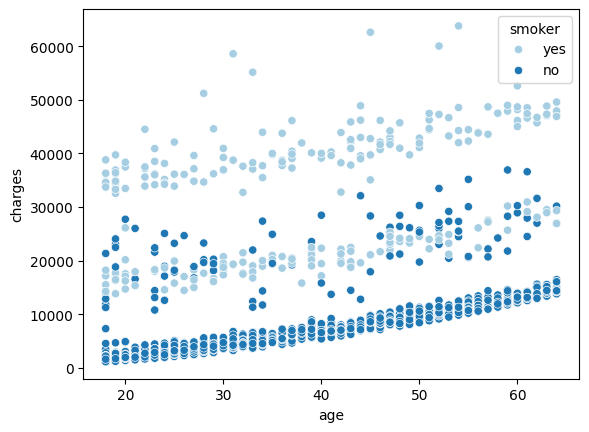

In [8]:
### Code here
sns.scatterplot(data=insurance_df, x='age', y='charges', hue='smoker', palette='Paired')

## **Part 2: Linear Models for Regression and Classification**

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**.

### **2.1 Linear Regression**
We will now proceed with splitting the dataset and implementing linear regression to predict `insurance charges`.

In [9]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Split the dataset into features and labels
insurance_X = insurance_df.drop(columns=['charges'])
insurance_y = insurance_df['charges']

**2.1.1 Plot relationships between features (age, bmi, children, region) and the target variable `charges` as a small multiple of scatter plots.**
1. age
2. bmi
3. children
4. region

Make sure to label the axes.
<b></b>

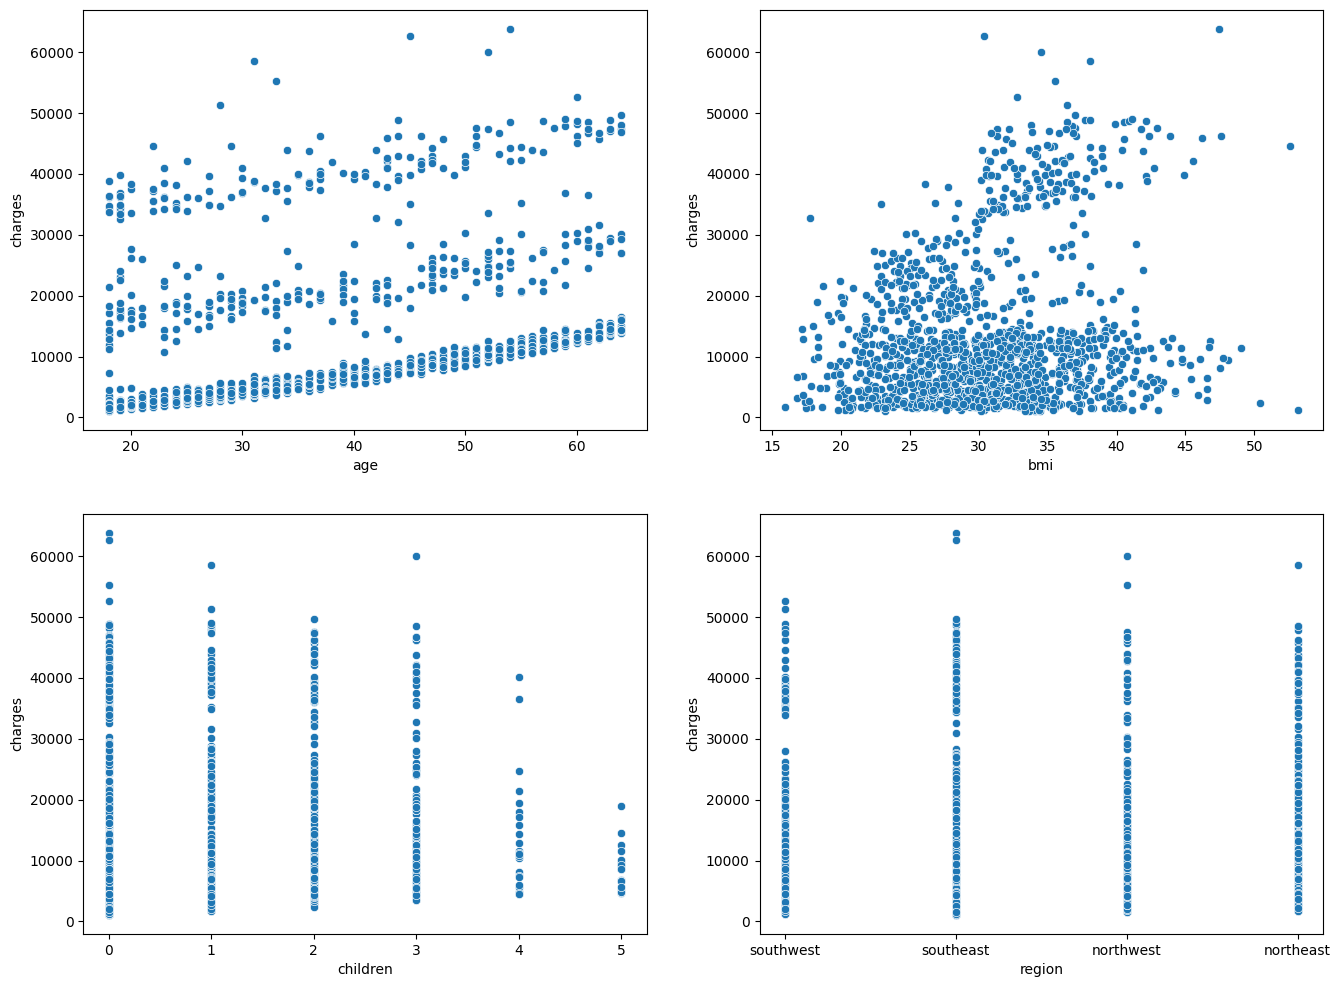

In [11]:
### Code here
fig, axes = plt.subplots(2,2, figsize=(16,12))

num_features = ['age', 'bmi', 'children', 'region']
for var, subplot in zip(num_features, axes.flatten()):
  sns.scatterplot(data=insurance_X, x=var, y=insurance_y, ax=subplot)

# sns.scatterplot(data=insurance_df, x='age', y='charges', ax=axes[0,0]) # sex
# sns.scatterplot(data=insurance_df, x='bmi', y='charges', ax=axes[0,1]) # bmi
# sns.scatterplot(data=insurance_df, x='children', y='charges', ax=axes[1, 0]) # children
# sns.scatterplot(data=insurance_df, x='region', y='charges', ax=axes[1,1]) # region

**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**


In [12]:
# Comment here >> below!

### Comment here
I think linear regression may not be the ideal model for this problem. The visualizations above suggest that the relationships between the features (age, bmi, children, region) and the target variable (charges) are non-linear, which could limit the performance of a linear regression model.

Specifically, while the relationship between age and charges would be a positive correlation-indicating that charges increase with age-it is not perfectly linear. This is because the bands of data points reflect that other factors might also influence charges, resulting in a more complex pattern.
Furthermore, for the BMI feature, there is a dense cluster of points for BMI values below around 30, indicating that a non-linear model might be more suited for capturing these variations.
For the children feature, while it shows the variation in charges based on the number of children, there are no clear linear trends with charges.
Finally, the region feature is categorical, meaning it does not have a numerical relationship with charges. To use it in a linear regression model, this feature should be encoded into numerical.

Hence, for these reasons, linear regression might not be appropriate to capture these patterns of such features, as it assumes a linear relationship between the independent features and the target variable.

### **Data Preprocessing**

Before we can fit a linear regression model, several pre-processing steps should be applied to the dataset:

1. **Encode categorical features appropriately** (e.g., `sex`, `smoker`, `region`).
2. **Check for multicollinearity** by analyzing the correlation matrix and removing any highly collinear features.
3. **Split the dataset** into training (60%), validation (20%), and test (20%) sets.
4. **Standardize the feature matrices** (`X_train`, `X_val`, and `X_test`) to have zero mean and unit variance. Ensure that the standardization parameters (mean, variance) are learned from `X_train` and then applied to all sets to avoid information leakage.
5. **Add a column of ones** to `X_train`, `X_val`, and `X_test` for learning the bias term in the linear model.


**2.1.3 Encode the categorical variables of the Insurance dataset.**

In [13]:
cat_features = ['sex', 'smoker','region']

for features in cat_features:
  print(features, insurance_X[features].unique())


sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
### Code here

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(insurance_X[cat_features]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_features))

# Display the resulting DataFrame
print(encoded_df)

      sex_male  smoker_yes  region_northwest  region_southeast  \
0          0.0         1.0               0.0               0.0   
1          1.0         0.0               0.0               1.0   
2          1.0         0.0               0.0               1.0   
3          1.0         0.0               1.0               0.0   
4          1.0         0.0               1.0               0.0   
...        ...         ...               ...               ...   
1333       1.0         0.0               1.0               0.0   
1334       0.0         0.0               0.0               0.0   
1335       0.0         0.0               0.0               1.0   
1336       0.0         0.0               0.0               0.0   
1337       0.0         1.0               1.0               0.0   

      region_southwest  
0                  1.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
1333               0.0  
1334   

In [15]:
### Code here
insurance_X = insurance_X.drop(cat_features, axis=1)
insurance_X = pd.concat([insurance_X, encoded_df], axis=1)
print(insurance_X)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0       0.0         1.0               0.0   
1      18  33.770         1       1.0         0.0               0.0   
2      28  33.000         3       1.0         0.0               0.0   
3      33  22.705         0       1.0         0.0               1.0   
4      32  28.880         0       1.0         0.0               1.0   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3       1.0         0.0               1.0   
1334   18  31.920         0       0.0         0.0               0.0   
1335   18  36.850         0       0.0         0.0               0.0   
1336   21  25.800         0       0.0         0.0               0.0   
1337   61  29.070         0       0.0         1.0               1.0   

      region_southeast  region_southwest  
0                  0.0               1.0  
1                  1.0               0.0  
2                 

**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >= 0.8). If yes, drop one from each pair of highly correlated features from the dataframe. It is fine if you do not find any highly correlated features. Why could this be necessary before proceeding further?**

                       age       bmi  children  sex_male  smoker_yes  \
age               1.000000  0.109272  0.042469 -0.020856   -0.025019   
bmi               0.109272  1.000000  0.012759  0.046371    0.003750   
children          0.042469  0.012759  1.000000  0.017163    0.007673   
sex_male         -0.020856  0.046371  0.017163  1.000000    0.076185   
smoker_yes       -0.025019  0.003750  0.007673  0.076185    1.000000   
region_northwest -0.000407 -0.135996  0.024806 -0.011156   -0.036945   
region_southeast -0.011642  0.270025 -0.023066  0.017117    0.068498   
region_southwest  0.010016 -0.006205  0.021914 -0.004184   -0.036945   

                  region_northwest  region_southeast  region_southwest  
age                      -0.000407         -0.011642          0.010016  
bmi                      -0.135996          0.270025         -0.006205  
children                  0.024806         -0.023066          0.021914  
sex_male                 -0.011156          0.017117       

<Axes: >

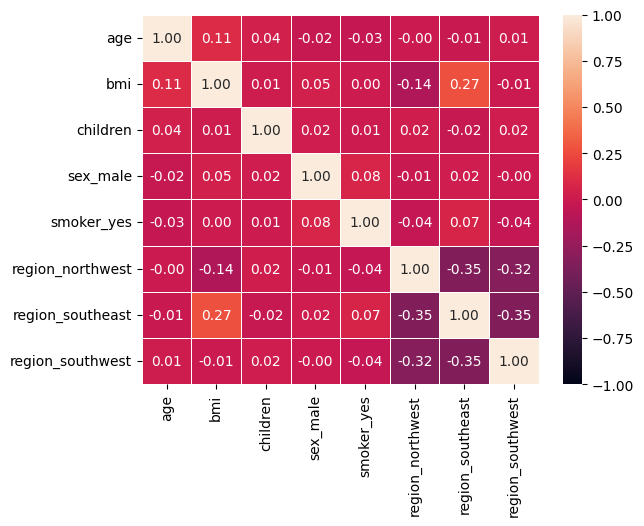

In [16]:
### Code here
corr_matrix = insurance_X.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, linewidth=.5, fmt='.2f')

In [17]:
# high correlation between the given numerical features (Threshold >= 0.8)

threshold = 0.8
high_corr_features = np.where(np.abs(corr_matrix) >= threshold)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
print(high_corr_features)

[]


In [18]:
# drop one from each pair of highly correlated features from the dataframe

for features in high_corr_features:
  if features[0] in insurance_X.columns:
    insurance_X.drop(features[0], axis=1, inplace=True)

print(insurance_X.columns)
print(insurance_X)

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0       0.0         1.0               0.0   
1      18  33.770         1       1.0         0.0               0.0   
2      28  33.000         3       1.0         0.0               0.0   
3      33  22.705         0       1.0         0.0               1.0   
4      32  28.880         0       1.0         0.0               1.0   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3       1.0         0.0               1.0   
1334   18  31.920         0       0.0         0.0               0.0   
1335   18  36.850         0       0.0         0.0               0.0   
1336   21  25.800         0       0.0         0.0               0.0   
1337   61  29.070         0       0.0         1.0               1.0   

In [19]:
### Comment here >> below!

### Comment here

One of the primary reasons it is beneficial to drop one feature from each pair of highly correlated features is to resolve multi-collinearity.
Multi-collinearity arises when there are highly correlated features, providing redundant information to the model. This can reduce the interpretability and stability of the models.

To handle this, we can drop highly correlated features. Specifically, we can remove one category from each set of encoded categories by setting the 'drop' parameter of OneHotEncoder to 'first'.

Dropping highly correlated features not only eliminates redundancy but also reduces model complexity. This simplifies the model, thereby improving its generalization ability.


**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [20]:
### Code here
insurance_X_dev, insurance_X_test, insurance_y_dev, insurance_y_test = train_test_split(insurance_X, insurance_y, test_size = 0.2, random_state=42)
insurance_X_train, insurance_X_val, insurance_y_train, insurance_y_val = train_test_split(insurance_X_dev, insurance_y_dev, test_size = 0.25, random_state=42)

print(insurance_X_dev.shape, insurance_X_test.shape, insurance_y_dev.shape, insurance_y_test.shape)
print(insurance_X_train.shape, insurance_X_val.shape, insurance_y_train.shape, insurance_y_val.shape)

(1070, 8) (268, 8) (1070,) (268,)
(802, 8) (268, 8) (802,) (268,)


**2.1.6 Standardize the columns in the feature matrices.**

In [21]:
### Code here
scaler = StandardScaler()
insurance_X_train = scaler.fit_transform(insurance_X_train)
insurance_X_val = scaler.transform(insurance_X_val)
insurance_X_test = scaler.transform(insurance_X_test)

In [22]:
# Adding a column of ones to include the bias term

insurance_X_train = np.hstack([np.ones((insurance_X_train.shape[0], 1)), insurance_X_train])
insurance_X_val = np.hstack([np.ones((insurance_X_val.shape[0], 1)), insurance_X_val])
insurance_X_test = np.hstack([np.ones((insurance_X_test.shape[0], 1)), insurance_X_test])

At the end of this pre-processing, you should have the following vectors and matrices:

- **insurance_X_train**: Training set feature matrix.
- **insurance_X_val**: Validation set feature matrix.
- **insurance_X_test**: Test set feature matrix.
- **insurance_y_train**: Training set labels (insurance charges).
- **insurance_y_val**: Validation set labels.
- **insurance_y_test**: Test set labels.


### Implement Linear Regression

Now that the data is preprocessed, we can implement a linear regression model, specifically Ridge Regression, which incorporates L2 regularization.

Given a feature matrix \( X \), a label vector \( y \), and a weight vector \( w \), the hypothesis function for linear regression is:

$$
y = X w
$$

The objective is to find the optimal weight vector \( w \) that minimizes the following loss function:



$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

Where:
-  $\| X w - y \|^2_2$ penalizes predictions that differ from actual labels.
- $\alpha \| w \|^2_2$ is the regularization term, helping reduce overfitting by penalizing large weights.
-  $\alpha$ is the regularization parameter.

The closed-form solution for Ridge Regression is given by the Normal Equations:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$





**2.1.7 Implement a `LinearRegression` class with `train` and `predict` methods**

We will now implement a custom `LinearRegression` class with L2 regularization (Ridge Regression).

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [23]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution.
        Parameters:
        X : (m x n) feature matrix
        y: (m x 1) label vector
        '''
        ### Your code here
        # The closed-form solution for Ridge Regression
        # w = (X.T * X + alpha * I)^(-1) * X.T * y
        I = np.eye(X.shape[1]) # idneity matrix
        I[0, 0] = 0  # not regularize the bias term
        self.w = np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)

    def predict(self, X):
        '''Predicts on X using trained model.
        Parameters:
        X : (m x n) feature matrix
        Returns:
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here

        y_pred = X @ self.w

        return y_pred

**2.1.8 Train, Evaluate, and Interpret Linear Regression Model**

**Train a linear regression model ($\alpha = 0$) on the insurance dataset. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**


In [24]:
def get_report(y_pred, y_test):
    """
    Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns:
        A dataframe with 6 rows comparing predictions and actuals.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual': actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [25]:
### Code here
model = LinearRegression(alpha=0)
model.train(insurance_X_train, insurance_y_train)

insurance_y_train_pred = model.predict(insurance_X_train)
insurance_y_val_pred = model.predict(insurance_X_val)
insurance_y_test_pred = model.predict(insurance_X_test)

score_train = r2_score(insurance_y_train, insurance_y_train_pred)
score_val = r2_score(insurance_y_val, insurance_y_val_pred)
score_test = r2_score(insurance_y_test, insurance_y_test_pred)

print("R2 score on train set:", score_train)
print("R2 score on validation set:", score_val)
print("R2 score on test set:", score_test)
print()

report = get_report(insurance_y_test_pred, insurance_y_test)
print("First 3 and last 3 predictions on the test set:")
print(report)

R2 score on train set: 0.7456575125269083
R2 score on validation set: 0.7282907846159223
R2 score on test set: 0.7825828922009138

First 3 and last 3 predictions on the test set:
            Prediction       Actual
Position                           
1          8822.361197   9095.06825
2          6919.890821   5272.17580
3         36208.994457  29330.98315
266        7454.552824   6067.12675
267       40531.472584  63770.42801
268       12267.581092   9872.70100


**2.1.9 Use the mean of the training labels (insurance_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [26]:
### Code here

mean_train = np.mean(insurance_y_train)
print('mean of the train labels:', mean_train)
print()

baseline_train = np.full(insurance_y_train.shape, mean_train)
baseline_val = np.full(insurance_y_val.shape, mean_train)
baseline_test = np.full(insurance_y_test.shape, mean_train)

r2_baseline_train = r2_score(insurance_y_train, baseline_train)
r2_baseline_val = r2_score(insurance_y_val, baseline_val)
r2_baseline_test = r2_score(insurance_y_test, baseline_test)

print("--- Baseline ---")
print("R2 score on train set:", r2_baseline_train)
print("R2 score on validation set:", r2_baseline_val)
print("R2 score on test set:", r2_baseline_test)

mean of the train labels: 13039.7602778803

--- Baseline ---
R2 score on train set: 0.0
R2 score on validation set: -0.008875704081438007
R2 score on test set: -3.287713156874261e-05


**2.1.10 Interpret your model trained on the insurance dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

['bias term', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
[13039.76027788  3568.65241482  2092.55499631   500.13661442
   -78.94538985  9398.48952926  -194.0148176   -257.97985216
  -331.38066817]


Text(0.5, 0, 'Weights')

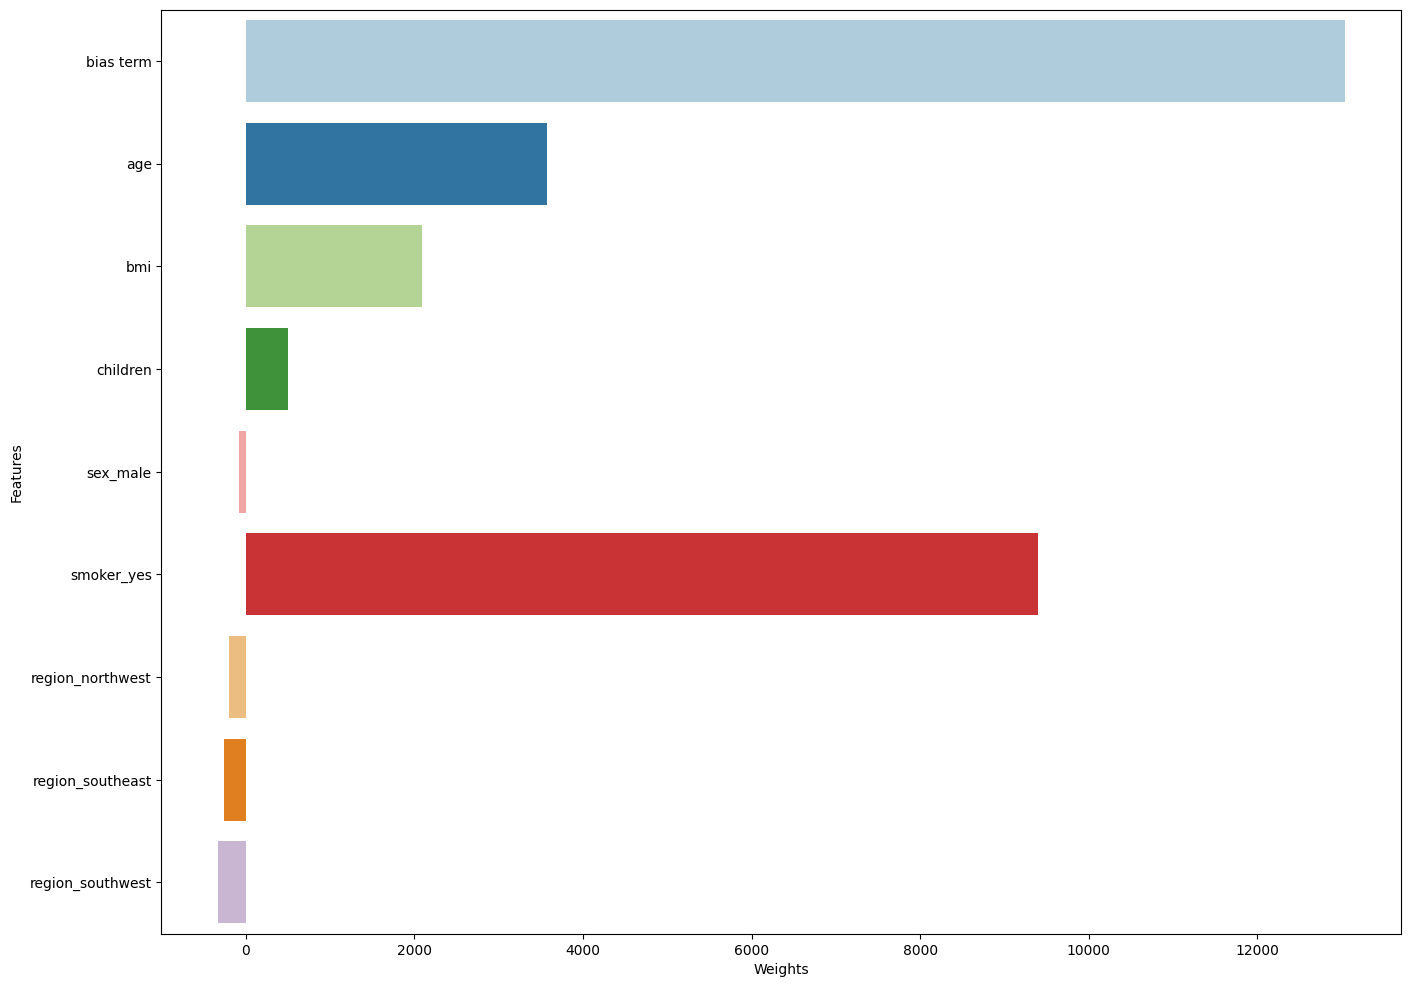

In [27]:
### Code here
feature_name = ['bias term'] + list(insurance_X.columns)
print(feature_name)

weights = model.w
print(weights)

plt.figure(figsize=(16,12))
sns.barplot(x=weights, y=feature_name, hue=feature_name, palette='Paired', orient='h')
plt.ylabel('Features')
plt.xlabel('Weights')

[0 5 1 2 3 8 7 6 4]


Text(0.5, 0, 'Weights')

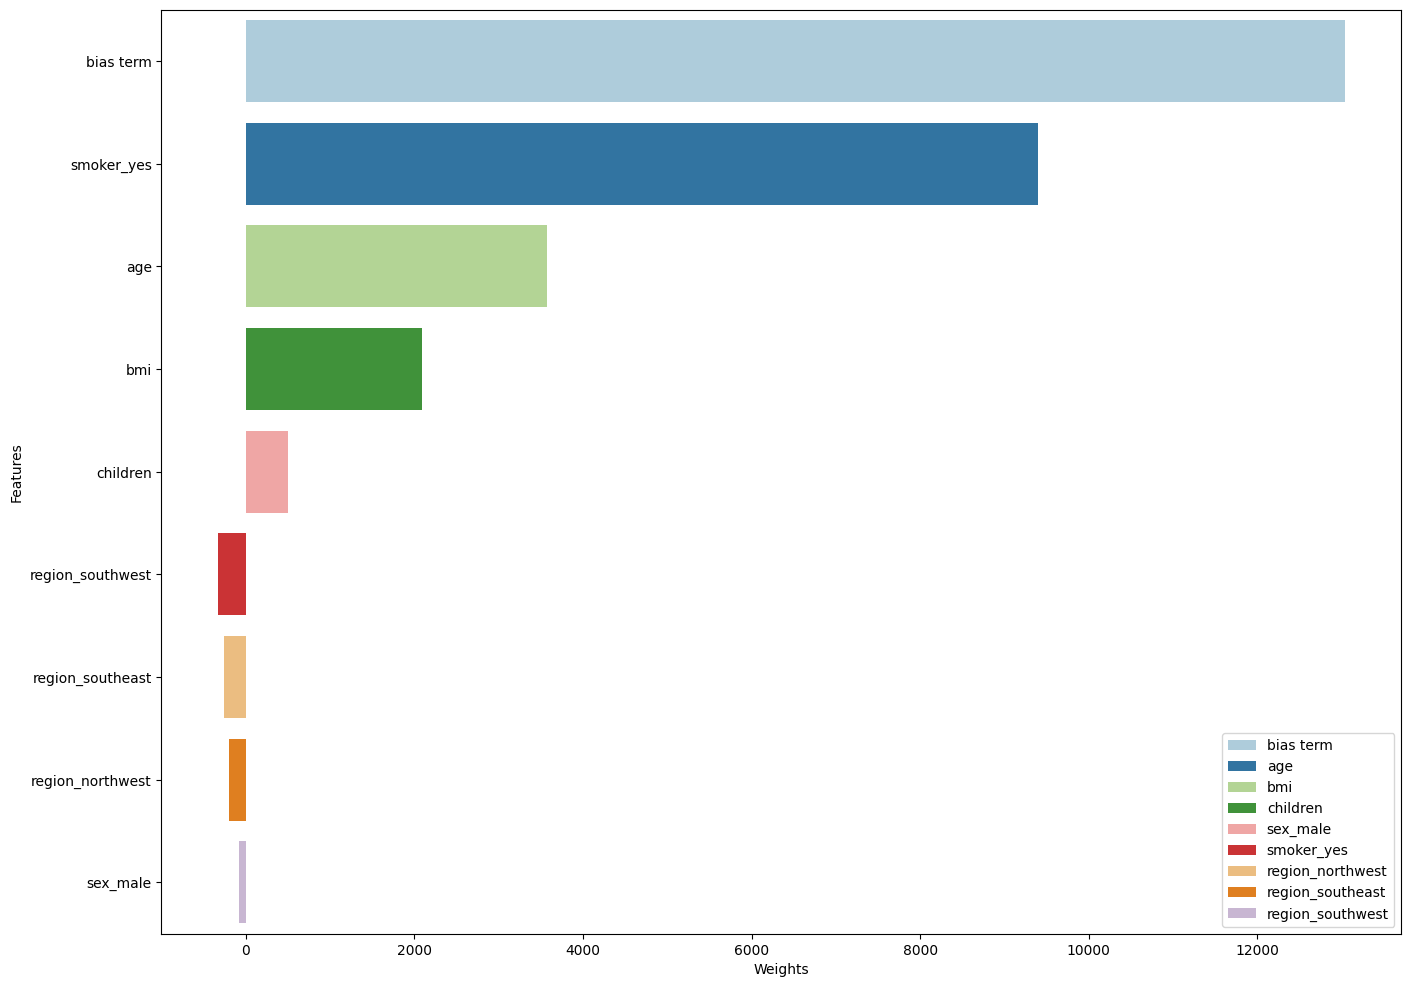

In [28]:
sorted_index = np.argsort(-np.abs(weights))
print(sorted_index)

sorted_feature_name = [feature_name[i] for i in sorted_index]
sorted_weights = weights[sorted_index]

plt.figure(figsize=(16,12))
sns.barplot(x=sorted_weights, y=sorted_feature_name, hue=feature_name, palette='Paired', orient='h')
plt.ylabel('Features')
plt.xlabel('Weights')

**2.1.11 According to your model, which features are the greatest contributors to insurance charges?**

In [29]:
### Comment here >> below!

### Comment here
The greatest contributor to insurance charges is the 'Smoker' feature, with a coefficient of 9398.49.
This indicates that being a smoker would increase insurance charges.

### **Hyperparameter Tuning ($\alpha$)**

Now, let's tune the $\alpha$ regularization parameter for ridge regression on the insurance dataset.

**2.1.12 Sweep out values for $\alpha$ using `alphas = np.logspace(-5, 1, 20)`. Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. Plot the results with a log scale for $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.****

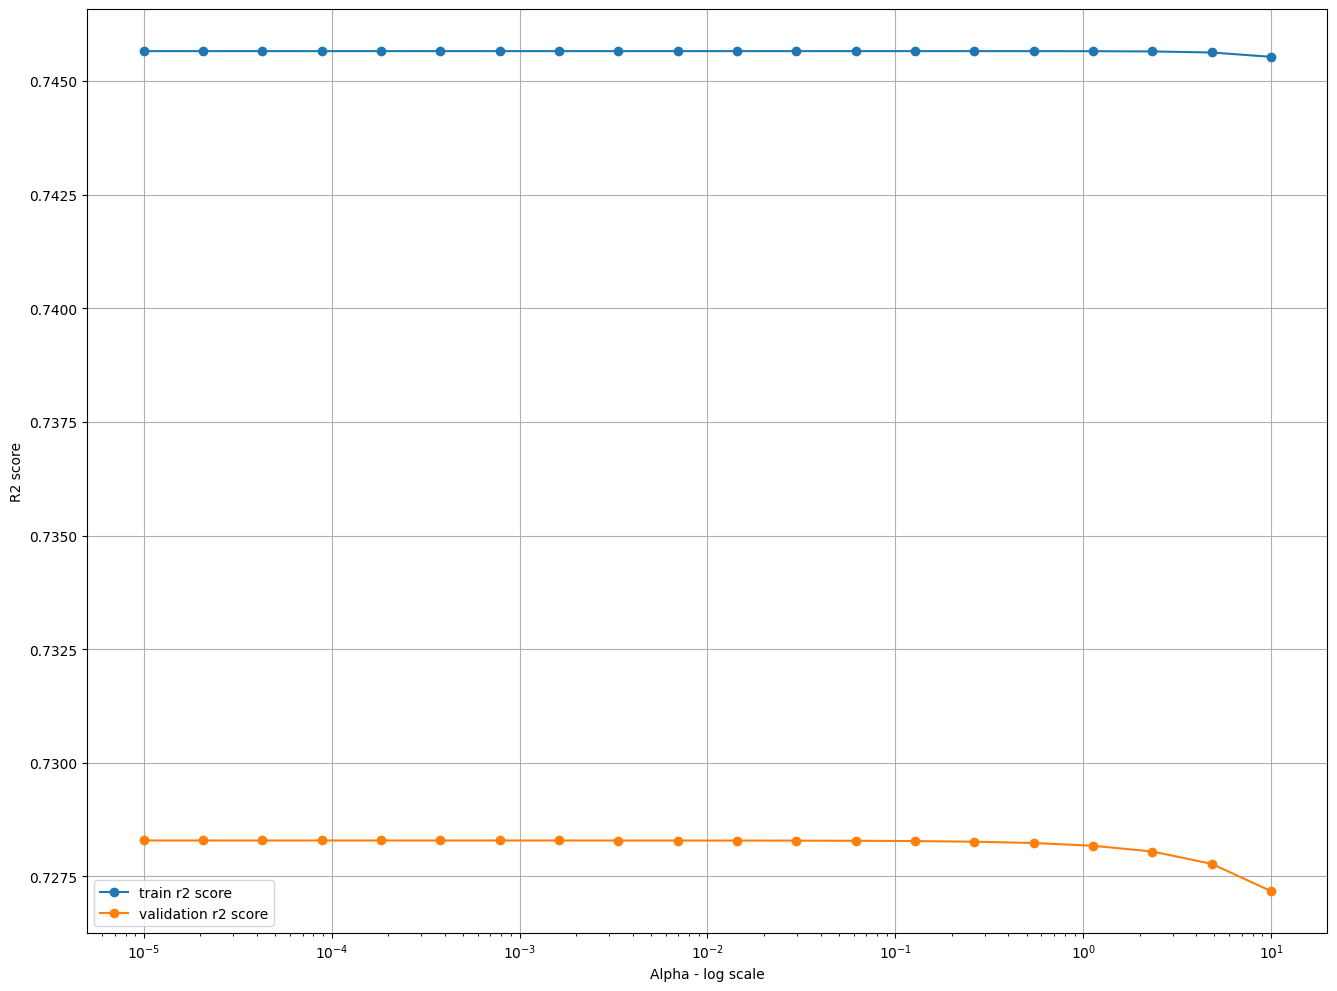

In [30]:
### Code here

alphas = np.logspace(-5,1,20)

train_r2s = []
val_r2s = []

for alpha in alphas:
  model = LinearRegression(alpha=alpha)

  model.train(insurance_X_train, insurance_y_train)

  train_preds = model.predict(insurance_X_train)
  val_preds = model.predict(insurance_X_val)

  train_r2 = r2_score(insurance_y_train, train_preds)
  val_r2 = r2_score(insurance_y_val, val_preds)

  train_r2s.append(train_r2)
  val_r2s.append(val_r2)

# print(train_r2s)
# print(val_r2s)

plt.figure(figsize=(16,12))
plt.plot(alphas, train_r2s, label="train r2 score", marker='o')
plt.plot(alphas, val_r2s, label='validation r2 score', marker='o')
plt.xscale('log')
plt.xlabel('Alpha - log scale')
plt.ylabel('R2 score')
plt.legend()
plt.grid()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with increasing $\alpha$?**

In [31]:
### Comment here >> below!

### Comment here

For the training set, the R^2 score remains almost constant across different values of alpha (the regularization strength). This means that increasing alpha has little or no effect on the model's ability to train the data. As a result, when alpha is small (minimal regularization), the model can fit the data well without much constraint.

In the validation set, the R^2 score is also relatively steady for small alpha values. However, once alpha exceeds 1, the R^2 score begins to decrease. This suggests that as alpha increases, the model becomes excessively regularized. When alpha increases significantly (such as 10), the validation curve drops noticeably, while the train curve remains relatively flat. This indicates that the model is underfitting the data, meaning it has become too simple to capture the complexity of the data due to excessive regularization.

To sum up, when alpha is small, the model has minimal regularization and learns effectively, resulting in stable R^2 scores for both the train and validation sets. As alpha increases, the regularization strength increases, but the model continues to perform steadily (adequately) for a while. However, if alpha becomes too large, the model becomes overly simplified, leading to underfitting, as reflected by the drop in the validation R^2 score. Conclusively, selecting an alpha value that balances bias and variance is crucial for achieving good models' generalization without overfitting or underfitting.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [32]:
### Code here

loan_data_df = pd.read_csv('/content/loan_data.csv') # using Colab
print(loan_data_df.info())
print(loan_data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0 

In [33]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [34]:
### Code here
print(loan_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


In [35]:
### Code here
column_names = list(loan_data_df.columns)
print("Columns name")
print(column_names)
print()

cat_columns = [column for column in column_names if loan_data_df[column].dtype == 'object']
print("Categorical Columns")
print(cat_columns)

for column in cat_columns:
  print(column, loan_data_df[column].unique())

Columns name
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Categorical Columns
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [36]:
print("Missing Values")
miss_columns = [column for column in column_names if loan_data_df[column].isna().sum() > 0]
print(miss_columns)

print("data shape:", loan_data_df.shape)

for column in miss_columns:
  miss_index = loan_data_df[loan_data_df[column].isna()].index
  print(column, len(miss_index))
  print(miss_index)



Missing Values
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data shape: (614, 12)
Gender 13
Index([23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592], dtype='int64')
Married 3
Index([104, 228, 435], dtype='int64')
Dependents 15
Index([102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517, 571,
       597],
      dtype='int64')
Self_Employed 32
Index([ 11,  19,  24,  29,  30,  95, 107, 111, 114, 158, 170, 218, 231, 236,
       268, 295, 333, 336, 344, 374, 380, 385, 411, 432, 447, 463, 468, 535,
       542, 579, 600, 601],
      dtype='int64')
LoanAmount 22
Index([  0,  35,  63,  81,  95, 102, 103, 113, 127, 202, 284, 305, 322, 338,
       387, 435, 437, 479, 524, 550, 551, 605],
      dtype='int64')
Loan_Amount_Term 14
Index([19, 36, 44, 45, 73, 112, 165, 197, 223, 232, 335, 367, 421, 423], dtype='int64')
Credit_History 50
Index([ 16,  24,  30,  42,  79,  83,  86,  95, 117, 125, 129, 130, 156, 181,
     

In [37]:
from sklearn.impute import SimpleImputer

# numerical
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

imputer_num = SimpleImputer(strategy='mean')
loan_data_df[num_columns] = imputer_num.fit_transform(loan_data_df[num_columns])

# categorical
imputer_cat = SimpleImputer(strategy='most_frequent')
loan_data_df[cat_columns] = imputer_cat.fit_transform(loan_data_df[cat_columns])

print(loan_data_df.isna().sum())
print(loan_data_df.info())
print(loan_data_df.shape)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 no

In [38]:
### Comment here >> Below!

### Comment here

Upon inspecting the dataset using loan_data_df.info(), we observe that it consists of 614 rows and 12 columns.  Also, the columns with missing values are: ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'].
Therefore, there are missing values in the datasets.

The simplest way to handle missing values is to drop the rows containing NaN values(missing values). However, this approach may not be suitable when the dataset is small, as it would reduce the amount of data available for training the model. Instead, a better approach to handle missing values without losing data is to impute them using strategies, such as filling them with the mean, median, or the most frequent values.

In this case, missing values in numerical columns were handled by imputing with the mean, while those in categorical columns were filled with the mode.

**2.2.3 Encode the categorical variables.**

In [39]:
print("categorical variables")
print(cat_columns)

categorical variables
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [40]:
### Code here
ordial_columns = ['Dependents', 'Education', 'Property_Area']

orders = [
    ['0', '1', '2', '3+'],
    ['Not Graduate', 'Graduate'],
    ['Rural','Semiurban', 'Urban']
]
encoder1 = OrdinalEncoder(categories = orders)
converted_column = encoder1.fit_transform(loan_data_df[ordial_columns])
loan_data_df[ordial_columns] = encoder1.fit_transform(loan_data_df[ordial_columns])
print(loan_data_df.head())

  Gender Married  Dependents  Education Self_Employed  ApplicantIncome  \
0   Male      No         0.0        1.0            No           5849.0   
1   Male     Yes         1.0        1.0            No           4583.0   
2   Male     Yes         0.0        1.0           Yes           3000.0   
3   Male     Yes         0.0        0.0            No           2583.0   
4   Male      No         0.0        1.0            No           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area Loan_Status  
0            2.0           Y  
1            0.0           N  
2            2.0           Y  
3         

In [41]:
not_ordial_columns = ['Gender', 'Married', 'Self_Employed', 'Loan_Status']
encoder2 = OneHotEncoder(handle_unknown='ignore', drop='first')
encoded_data = encoder2.fit_transform(loan_data_df[not_ordial_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder2.get_feature_names_out(not_ordial_columns))
loan_data_df = loan_data_df.drop(not_ordial_columns, axis=1)
loan_data_df = pd.concat([loan_data_df, encoded_df], axis=1)

print(loan_data_df.head())

   Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0         0.0        1.0           5849.0                0.0  146.412162   
1         1.0        1.0           4583.0             1508.0  128.000000   
2         0.0        1.0           3000.0                0.0   66.000000   
3         0.0        0.0           2583.0             2358.0  120.000000   
4         0.0        1.0           6000.0                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Property_Area  Gender_Male  Married_Yes  \
0             360.0             1.0            2.0          1.0          0.0   
1             360.0             1.0            0.0          1.0          1.0   
2             360.0             1.0            2.0          1.0          1.0   
3             360.0             1.0            2.0          1.0          1.0   
4             360.0             1.0            2.0          1.0          0.0   

   Self_Employed_Yes  Loan_Status_Y  
0                0.0    

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [42]:
### Code here
y_counts = pd.Series(loan_data_df['Loan_Status_Y'].value_counts())
print(y_counts)
print("total data count:",len(loan_data_df['Loan_Status_Y']))

probability = y_counts / len(loan_data_df['Loan_Status_Y'])
print("\nprobability of categories")
print(probability)

Loan_Status_Y
1.0    422
0.0    192
Name: count, dtype: int64
total data count: 614

probability of categories
Loan_Status_Y
1.0    0.687296
0.0    0.312704
Name: count, dtype: float64


In [43]:
### Comment here >> below!

### Comment here

The distribution of labels appears to be unbalanced. When calculating the probability of each category for the target variable, we found that the proportion of "Loan Status: Yes" is around 68.7%, while "Loan Status: No" is about 31.3%. This indicates that the dataset is imbalanced.

In such cases, it is important to preserve the class distribution when splitting the data. One approach is to use stratified splitting, which ensures that the train and test sets maintain the same class proportions as the original datasets.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [44]:
### Code here

# split x data and y data
loan_data_X = loan_data_df.drop(columns=['Loan_Status_Y'])
loan_data_y = loan_data_df['Loan_Status_Y']

                   Dependents  Education  ApplicantIncome  CoapplicantIncome  \
Dependents           1.000000  -0.055752         0.118202           0.030430   
Education           -0.055752   1.000000         0.140760           0.062290   
ApplicantIncome      0.118202   0.140760         1.000000          -0.116605   
CoapplicantIncome    0.030430   0.062290        -0.116605           1.000000   
LoanAmount           0.163106   0.166998         0.565620           0.187828   
Loan_Amount_Term    -0.101054   0.077242        -0.045242          -0.059675   
Credit_History      -0.037392   0.077936        -0.014477          -0.001665   
Property_Area       -0.000244   0.065243        -0.009500           0.010522   
Gender_Male          0.172914  -0.045364         0.058809           0.082912   
Married_Yes          0.334216  -0.012304         0.051708           0.075948   
Self_Employed_Yes    0.056798   0.010383         0.127180          -0.016100   

                   LoanAmount  Loan_Amo

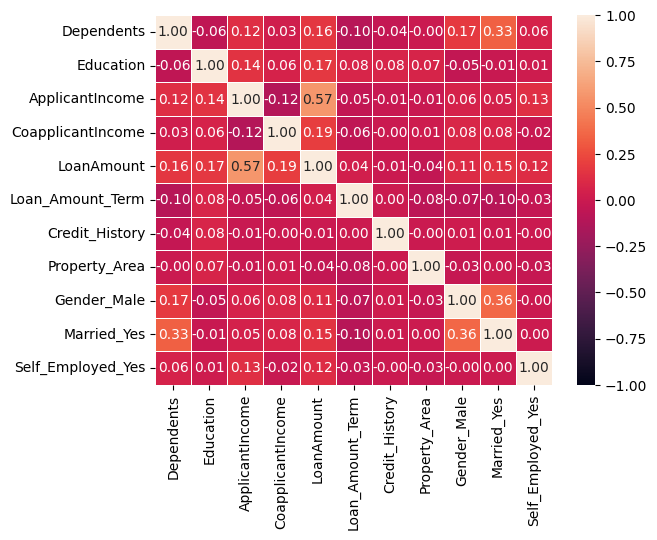

In [45]:
### Code here

corr_matrix = loan_data_X.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, linewidth=.5, fmt='.2f')
threshold = 0.9

high_corr_features = np.where(np.abs(corr_matrix) >= threshold)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
print(high_corr_features)

In [46]:
### Code here

for features in high_corr_features:
  if features[0] in loan_data_X.columns:
    loan_data_X.drop(features[0], axis=1, inplace=True)

print(loan_data_X.columns)
print(loan_data_X)

Index(['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Gender_Male', 'Married_Yes', 'Self_Employed_Yes'],
      dtype='object')
     Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0.0        1.0           5849.0                0.0  146.412162   
1           1.0        1.0           4583.0             1508.0  128.000000   
2           0.0        1.0           3000.0                0.0   66.000000   
3           0.0        0.0           2583.0             2358.0  120.000000   
4           0.0        1.0           6000.0                0.0  141.000000   
..          ...        ...              ...                ...         ...   
609         0.0        1.0           2900.0                0.0   71.000000   
610         3.0        1.0           4106.0                0.0   40.000000   
611         1.0        1.0           8072.0              240.0  253

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [47]:
### Code here

# 1. Convert the label from a Pandas series to a Numpy (m x 1) vector.
# If you don't do this, it may cause problems when implementing the logistic regression model.

print(loan_data_y.shape)
loan_data_y = loan_data_y.values.reshape(-1,1)
print(loan_data_y.shape)

(614,)
(614, 1)


In [48]:
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
loan_data_X_dev, loan_data_X_test, loan_data_y_dev, loan_data_y_test = train_test_split(loan_data_X, loan_data_y, test_size = 0.2, stratify = loan_data_y, random_state=42)
loan_data_X_train, loan_data_X_val, loan_data_y_train, loan_data_y_val = train_test_split(loan_data_X_dev, loan_data_y_dev, test_size = 0.25, stratify = loan_data_y_dev, random_state=42)

print(loan_data_X_dev.shape, loan_data_X_test.shape, loan_data_y_dev.shape, loan_data_y_test.shape)
print(loan_data_X_train.shape, loan_data_X_val.shape, loan_data_y_train.shape, loan_data_y_val.shape)

(491, 11) (123, 11) (491, 1) (123, 1)
(368, 11) (123, 11) (368, 1) (123, 1)


In [49]:
# 3. Standardize the columns in the feature matrices.
# To avoid information leakage, learn the standardization parameters from training,
# and then apply training, validation and test dataset.

scaler = StandardScaler()
loan_data_X_train = scaler.fit_transform(loan_data_X_train)
loan_data_X_val = scaler.transform(loan_data_X_val)
loan_data_X_test = scaler.transform(loan_data_X_test)

In [50]:
# 4. Add a column of ones to the feature matrices of train, validation and test dataset.
# This is a common trick so that we can learn a coefficient for the bias term of a linear mode

loan_data_X_train = np.c_[np.ones(loan_data_X_train.shape[0]), loan_data_X_train]
loan_data_X_val = np.c_[np.ones(loan_data_X_val.shape[0]), loan_data_X_val]
loan_data_X_test = np.c_[np.ones(loan_data_X_test.shape[0]), loan_data_X_test]

print(loan_data_X_train.shape, loan_data_X_val.shape, loan_data_X_test.shape)
# print(loan_data_X_train)

(368, 12) (123, 12) (123, 12)


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [51]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

[array([[242.37446043]]), array([[231.9339776]]), array([[223.33121688]]), array([[216.21715976]]), array([[210.30944856]]), array([[205.38135708]]), array([[201.25139748]]), array([[197.77432023]]), array([[194.83367266]]), array([[192.33580662]]), array([[190.205125]]), array([[188.38034076]]), array([[186.81154303]]), array([[185.45789754]]), array([[184.28584173]]), array([[183.26766443]]), array([[182.38038435]]), array([[181.60486103]]), array([[180.92508701]]), array([[180.32762184]]), array([[179.80113747]]), array([[179.33605141]]), array([[178.92422948]]), array([[178.55874386]]), array([[178.23367534]]), array([[177.94395098]]), array([[177.68521041]]), array([[177.45369521]]), array([[177.24615709]]), array([[177.05978136]]), array([[176.89212303]]), array([[176.74105313]]), array([[176.60471362]]), array([[176.48147929]]), array([[176.36992553]]), array([[176.26880101]]), array([[176.17700437]]), array([[176.09356438]]), array([[176.01762294]]), array([[175.94842056]]), ar

Text(0, 0.5, 'Loss')

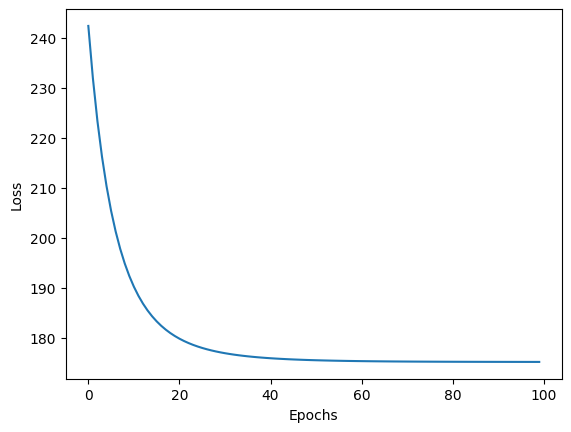

In [52]:
### Code here

#i) Using your implementation above, train a logistic regression model (alpha=0, t=100, eta=1e-3) on the loan training data.
# Plot the training loss over epochs.
# Make sure to label your axes. You should see the loss decreasing and start to converge.

model1 = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = model1.train(loan_data_X_train, loan_data_y_train)
print(loss)

loss = np.array(loss).squeeze()
print(loss)
plt.plot(range(len(loss)), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')


In [53]:
### Code here

# ii) Using alpha between (0,1), eta between(0, 0.001) and t between (0, 100), find the best hyperparameters for LogisticRegression.
# You can randomly search the space 20 times to find the best hyperparameters.
import random
from sklearn.metrics import log_loss

best_params = None
best_loss = float('inf')

for i in range(20):
  alpha = random.uniform(0,1)
  eta = random.uniform(0, 0.001)
  t = random.randint(0, 100)
  print('alpha, eta, t:', alpha, eta, t)

  model2 = LogisticRegression(alpha=alpha, t=t, eta=eta)
  loss = model2.train(loan_data_X_train, loan_data_y_train)
  # print('train loss: ', loss[-1])

  y_val_pred = model2.predict(loan_data_X_val)
  val_loss = log_loss(loan_data_y_val, y_val_pred)
  print('val loss: ', val_loss)

  # if loss[-1] < best_loss:
  if val_loss < best_loss:
    # best_loss = loss[-1]
    best_loss = val_loss
    best_params = {'alpha': alpha, 'eta': eta, 't': t}

print("Best loss :", np.array(best_loss).squeeze())
print("Best hyperparameters :", best_params)

alpha, eta, t: 0.34400651082334865 0.0004448867119675991 74
val loss:  7.32594581079617
alpha, eta, t: 0.8449191561205431 0.00022091715151712298 100
val loss:  7.32594581079617
alpha, eta, t: 0.21720200783744026 0.0005896681512204924 11
val loss:  7.32594581079617
alpha, eta, t: 0.8363756701732589 0.000850875686951536 10
val loss:  7.32594581079617
alpha, eta, t: 0.1410447842711282 0.0009255570520520022 84
val loss:  7.618983643228017
alpha, eta, t: 0.9958863056506676 0.0002648442635404026 4
val loss:  7.32594581079617
alpha, eta, t: 0.16998486913446575 0.0004903365627301075 76
val loss:  7.32594581079617
alpha, eta, t: 0.6310393176341554 0.00020873353826239606 32
val loss:  7.32594581079617
alpha, eta, t: 0.8132707568278873 0.00046164267118480176 11
val loss:  7.32594581079617
alpha, eta, t: 0.11395065428813644 0.0009149919883372849 44
val loss:  7.32594581079617
alpha, eta, t: 0.7770139226765556 0.0006281013057321752 65
val loss:  7.32594581079617
alpha, eta, t: 0.8121491150647352 0.

In [54]:
### Code here
#iii) Compare accuracy on the test dataset for both the scenarios.

from sklearn.metrics import accuracy_score

X_dev = np.concatenate((loan_data_X_train, loan_data_X_val), axis=0)
y_dev = np.concatenate((loan_data_y_train, loan_data_y_val), axis=0)

model1 = LogisticRegression(alpha=0, t=100, eta=1e-3) # redefine default model
model1.train(X_dev, y_dev)

model2 = LogisticRegression(alpha=best_params['alpha'], t=best_params['t'], eta=best_params['eta']) # redefine model with hyperparameter tuning
model2.train(X_dev, y_dev)

y_pred1 = model1.predict(loan_data_X_test)
y_pred2 = model2.predict(loan_data_X_test)

print("Accuracy on the test data for model(alpha=0, t=100, eta=1e-3):", accuracy_score(loan_data_y_test, y_pred1))
print("Accuracy on the test data for model(with hyperparameter tuning):", accuracy_score(loan_data_y_test, y_pred2))

Accuracy on the test data for model(alpha=0, t=100, eta=1e-3): 0.8536585365853658
Accuracy on the test data for model(with hyperparameter tuning): 0.8617886178861789


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

['bias term', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Male', 'Married_Yes', 'Self_Employed_Yes']
[ 8.26750077e-01  1.11689589e-01  1.75921350e-01 -1.91174546e-02
 -1.40930938e-01 -2.64827990e-02  5.35945520e-05  1.26690216e+00
  5.34360936e-02 -1.00459288e-01  2.74858079e-01 -7.50800898e-02]


Text(0.5, 1.0, 'model(alpha=0, t=100, eta=1e-3)')

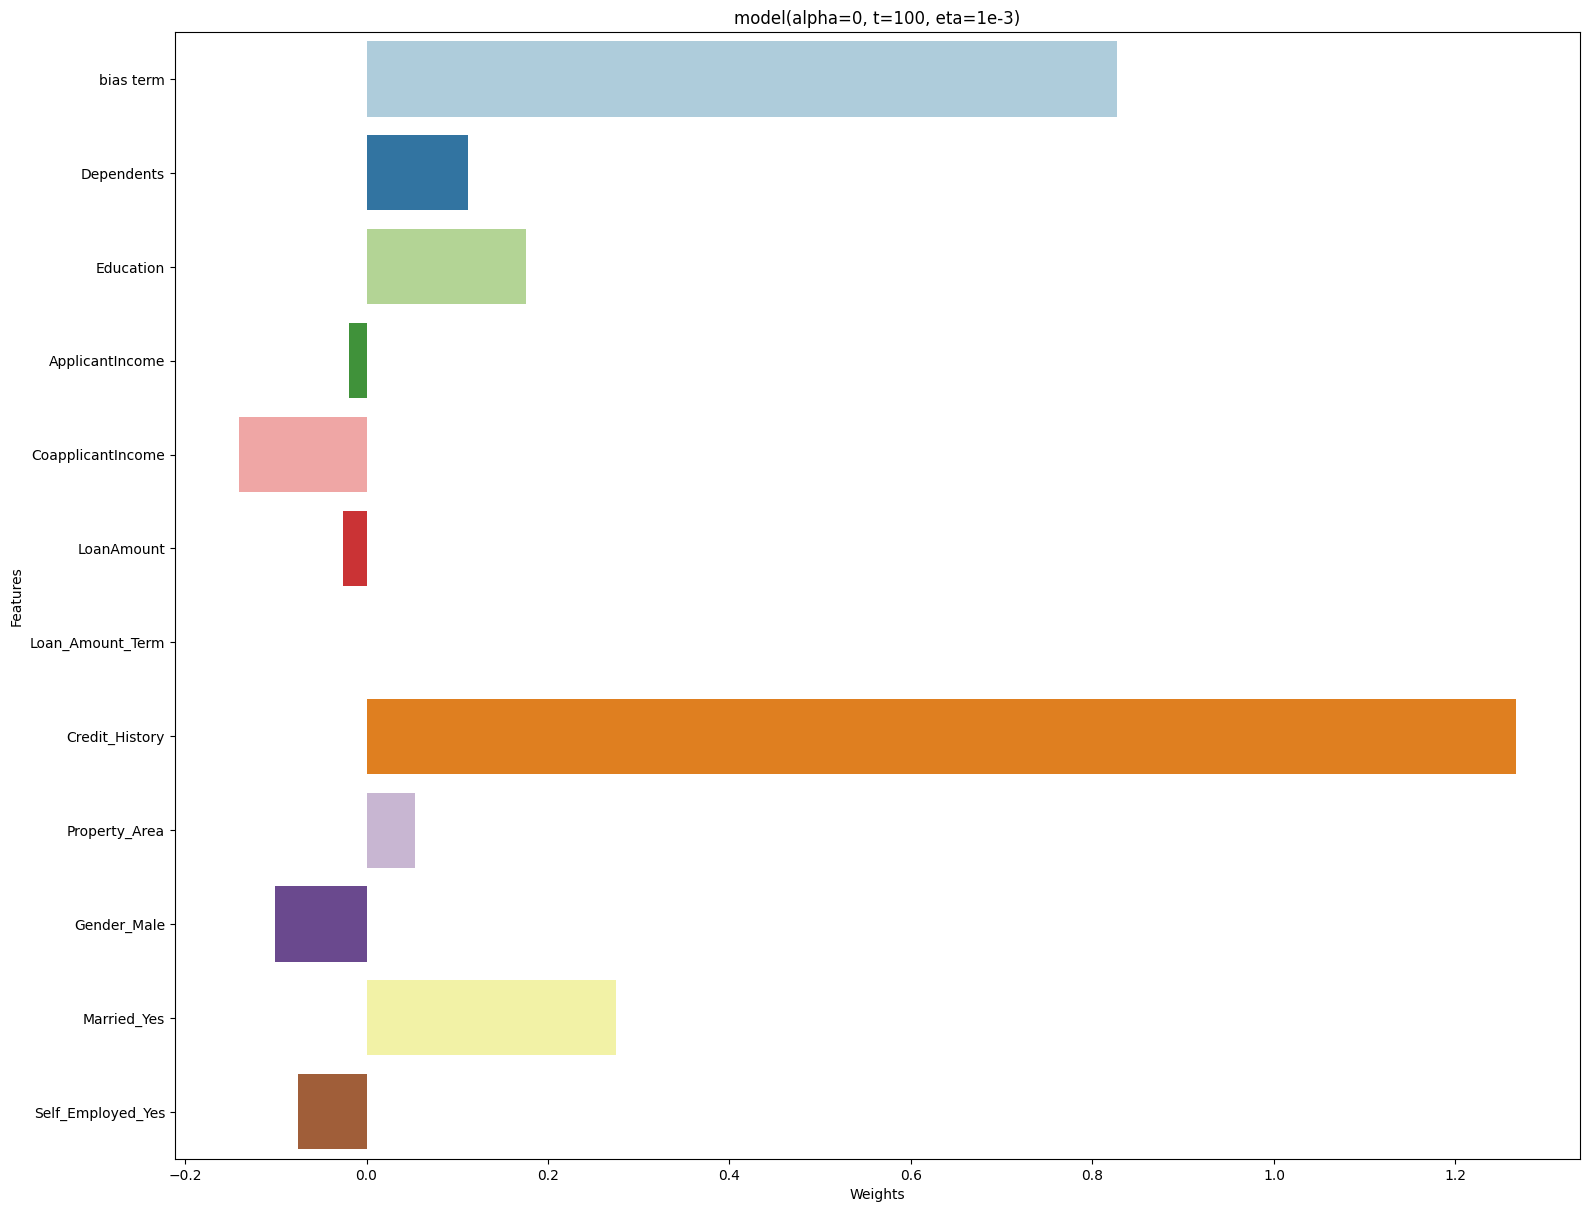

In [55]:
### Code here

feature_name = ['bias term'] + list(loan_data_X.columns)
print(feature_name)

weights = model1.w.squeeze()
print(weights)

plt.figure(figsize=(16,12))
sns.barplot(x=weights, y=feature_name, hue=feature_name, palette='Paired', orient='h')
plt.ylabel('Features')
plt.xlabel('Weights')
plt.tight_layout()
plt.title("model(alpha=0, t=100, eta=1e-3)")

[ 7  0 10  2  1  8  6  3  5 11  9  4]


Text(0.5, 1.0, 'model(alpha=0, t=100, eta=1e-3)')

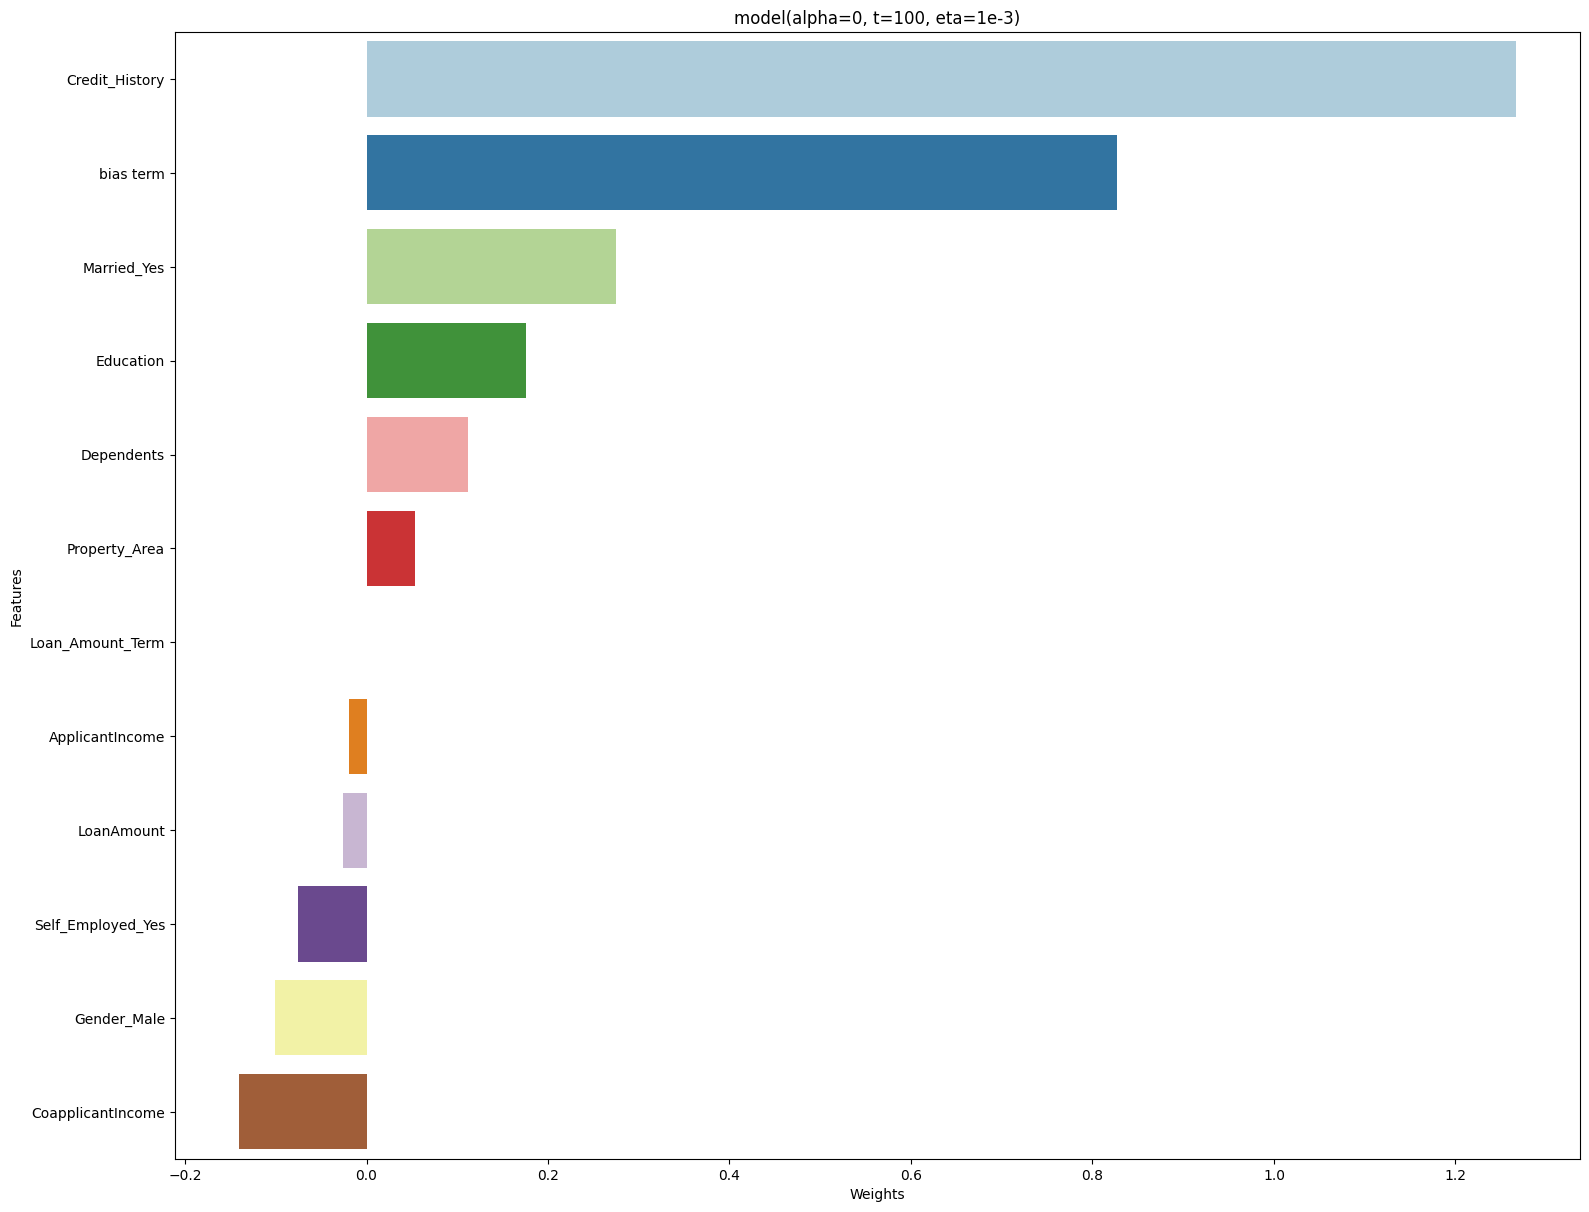

In [56]:
sorted_index = np.argsort(-weights)
print(sorted_index)

sorted_feature_name = [feature_name[i] for i in sorted_index]
sorted_weights = weights[sorted_index]

plt.figure(figsize=(16,12))
sns.barplot(x=sorted_weights, y=sorted_feature_name, hue=sorted_feature_name, palette='Paired', orient='h')
plt.ylabel('Features')
plt.xlabel('Weights')
plt.tight_layout()
plt.title("model(alpha=0, t=100, eta=1e-3)")

[ 0.79376983  0.08228416  0.15157448 -0.022594   -0.11961028 -0.02085116
  0.00824018  1.10978745  0.04980874 -0.07143812  0.22277262 -0.06003631]


Text(0.5, 1.0, 'model with hyperparameter tuning')

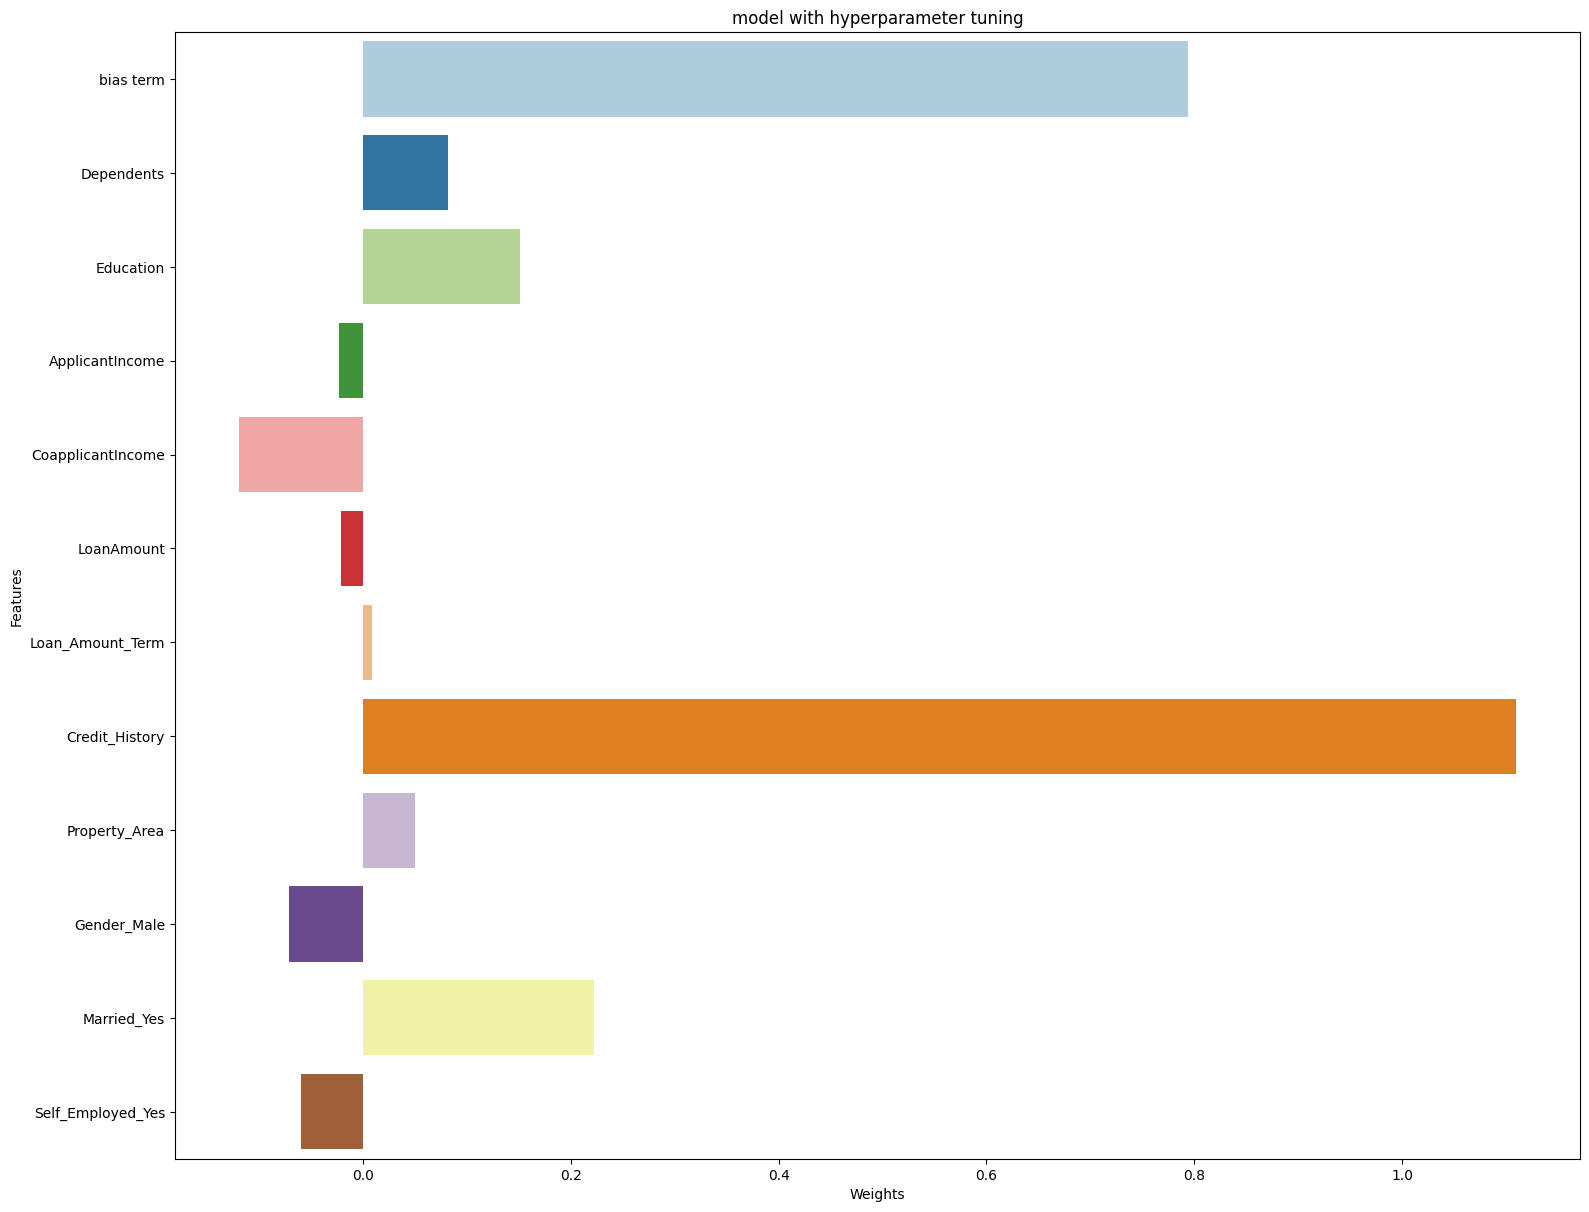

In [57]:
### Comment here
weights = model2.w.squeeze()
print(weights)

plt.figure(figsize=(16,12))
sns.barplot(x=weights, y=feature_name, hue=feature_name, palette='Paired', orient='h')
plt.ylabel('Features')
plt.xlabel('Weights')
plt.tight_layout()
plt.title("model with hyperparameter tuning")

[ 7  0 10  2  1  8  6  5  3 11  9  4]


Text(0.5, 1.0, 'model with hyperparameter tuning')

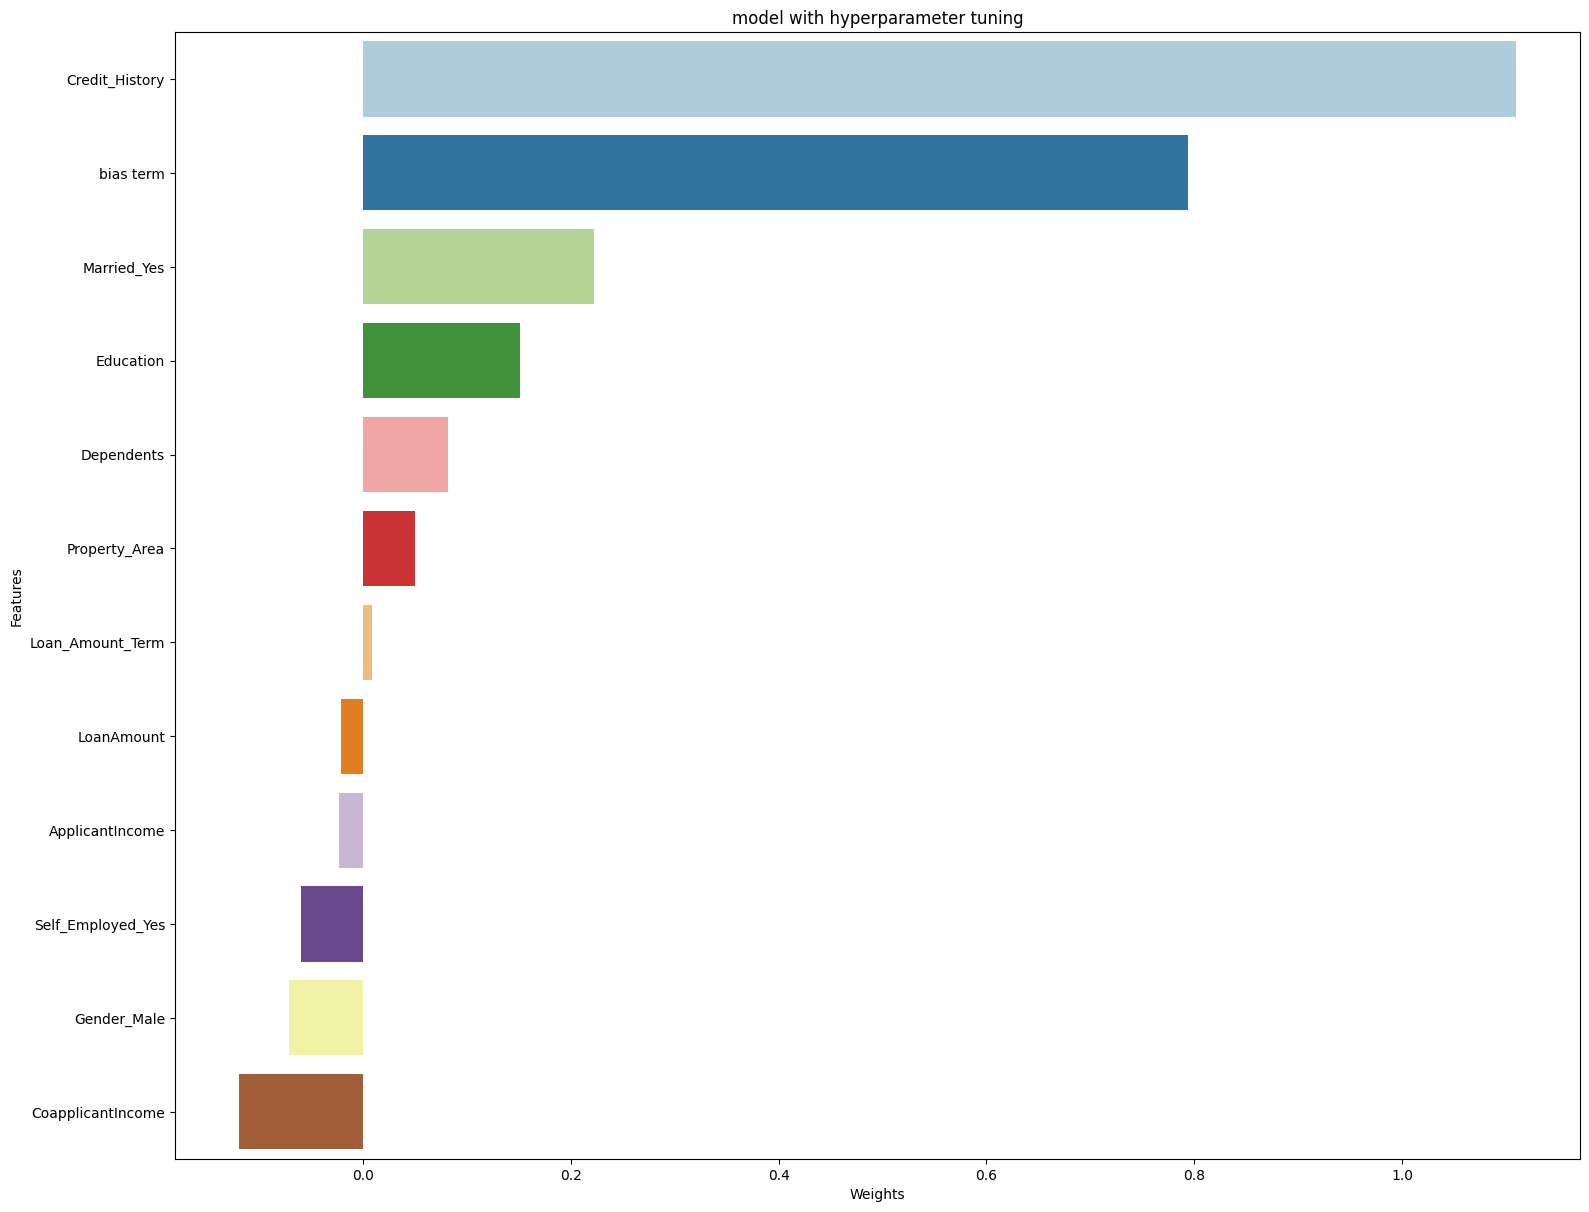

In [58]:
sorted_index = np.argsort(-weights)
print(sorted_index)

sorted_feature_name = [feature_name[i] for i in sorted_index]
sorted_weights = weights[sorted_index]

plt.figure(figsize=(16,12))
sns.barplot(x=sorted_weights, y=sorted_feature_name, hue=sorted_feature_name, palette='Paired', orient='h')
plt.ylabel('Features')
plt.xlabel('Weights')
plt.tight_layout()
plt.title("model with hyperparameter tuning")

In [59]:
### Commnet here >> below!

### Comment here

The graphs show that credit history has the most influence on the model's predictions, while Coapplicant Income has the least impact. In both the base model and the model with hyperparameter tuning, the feature with the greatest contribution to loan status is "Credit History". This indicates that having a credit history would increase the likelihood of loan approval.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [60]:
### Code here
primal_svm = LinearSVC() #primal
primal_svm.fit(loan_data_X_train, loan_data_y_train)

primal_y_train_pred = primal_svm.predict(loan_data_X_train)
primal_y_val_pred = primal_svm.predict(loan_data_X_val)
primal_y_test_pred = primal_svm.predict(loan_data_X_test)

print("Primal SVM Train accuracy:", accuracy_score(loan_data_y_train, primal_y_train_pred))
print("Primal SVM Validation accuracy:", accuracy_score(loan_data_y_val, primal_y_val_pred))
print("Primal SVM Test accuracy:", accuracy_score(loan_data_y_test, primal_y_test_pred))

Primal SVM Train accuracy: 0.8016304347826086
Primal SVM Validation accuracy: 0.7967479674796748
Primal SVM Test accuracy: 0.8617886178861789


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [61]:
### Code here
dual_svm = SVC() #dual
dual_svm.fit(loan_data_X_train, loan_data_y_train)

dual_y_train_pred = dual_svm.predict(loan_data_X_train)
dual_y_val_pred = dual_svm.predict(loan_data_X_val)
dual_y_test_pred = dual_svm.predict(loan_data_X_test)

print("Dual SVM Train accuracy:", accuracy_score(loan_data_y_train, dual_y_train_pred))
print("Dual SVM Validation accuracy:", accuracy_score(loan_data_y_val, dual_y_val_pred))
print("Dual SVM Test accuracy:", accuracy_score(loan_data_y_test, dual_y_test_pred))

Dual SVM Train accuracy: 0.8152173913043478
Dual SVM Validation accuracy: 0.7967479674796748
Dual SVM Test accuracy: 0.8455284552845529


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
